[View in Colaboratory](https://colab.research.google.com/github/izangel/myApp-5.3/blob/master/MNIST_Max.ipynb)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpngcyvhkr/pubring.gpg' created
gpg: /tmp/tmpngcyvhkr/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [3]:
%pylab inline
from keras import regularizers, activations
from keras.models import Sequential, load_model
from keras.utils import np_utils,plot_model,to_categorical
import pandas

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout,Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from IPython.display import SVG

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [4]:
from google.colab import files
src = list(files.upload().values())[0]
open('mnist_import.py','wb').write(src)
import mnist_import as mi

Saving mnist_import.py to mnist_import (2).py


In [5]:
training_set = mi.read(dataset = "training", path = "drive/app/mnist_data/")
testing_set = mi.read(dataset = "testing", path = "drive/app/mnist_data/")

#print(list(training_set))
#print(testing_set)

#while(True):
#    try:
#        train_set.append(training_set.__next__())
#    except StopIteration:
#        break

#while(True):
#    try:
#        test_set.append(testing_set.__next__())
#    except StopIteration:
#        break
        
train_set = list(training_set)
test_set = list(testing_set)

train_labels = np.asarray([i[0] for i in train_set])
train_images = np.asarray([i[1] for i in train_set])

test_images = np.asarray([i[1] for i in test_set])
test_labels = np.asarray([i[0] for i in test_set])

print(test_images.shape)
#print(train_set[0][1].shape)

(10000, 28, 28)


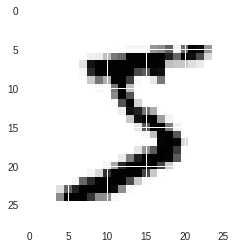

In [6]:
bitmap_index = 0
plt.imshow(train_images[bitmap_index,:].reshape(28, 28), interpolation=None)

In [7]:
X_train_reshape = []
X_test_reshape = []

for i,X in enumerate(train_images):
    X_train_reshape.append(X.reshape(28,28,1))
    
for i,X in enumerate(test_images):
    X_test_reshape.append(X.reshape(28,28,1))
    
X_train = np.asarray(X_train_reshape)
X_test = np.asarray(X_test_reshape)

print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (60000, 28, 28, 1)
X_test (10000, 28, 28, 1)


In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape[1])
print(test_labels.shape[1])

10
10


In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3), border_mode='valid', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32,(3,3), border_mode='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_labels.shape[1], activation='softmax'))
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="valid")`
  after removing the cwd from sys.path.


In [0]:
check_points = ModelCheckpoint("weights.{epoch:02d}-{val_acc:.2f}.hdf5",monitor = "val_acc")

In [0]:
#model = load_model('/output/weights.05-0.96.hdf5')

In [0]:
early_stops = EarlyStopping(patience=5, monitor='loss')

In [12]:
history = model.fit(X_train, train_labels, batch_size=500, epochs=5, validation_split=0.3, callbacks=[check_points])

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 39s 917us/step - loss: 5.3858 - acc: 0.5179 - val_loss: 0.3306 - val_acc: 0.9020
Epoch 2/5
42000/42000 [==============================] - 38s 915us/step - loss: 0.3737 - acc: 0.8825 - val_loss: 0.1926 - val_acc: 0.9417
Epoch 3/5
42000/42000 [==============================] - 39s 921us/step - loss: 0.2622 - acc: 0.9186 - val_loss: 0.1585 - val_acc: 0.9514
Epoch 4/5
24500/42000 [================>.............] - ETA: 14s - loss: 0.2234 - acc: 0.9304

42000/42000 [==============================] - 39s 929us/step - loss: 0.2158 - acc: 0.9329 - val_loss: 0.1315 - val_acc: 0.9607
Epoch 5/5
42000/42000 [==============================] - 39s 923us/step - loss: 0.1843 - acc: 0.9426 - val_loss: 0.1164 - val_acc: 0.9646


In [0]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis= 1)

In [0]:
!pip install -q pydot

In [14]:
!pip install graphviz 
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,122 kB of archives.
After this operation, 2

Selecting previously unselected package libxcb-shm0:amd64.
Preparing to unpack .../10-libxcb-shm0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libcairo2:amd64.
Preparing to unpack .../11-libcairo2_1.14.10-1ubuntu1_amd64.deb ...
Unpacking libcairo2:amd64 (1.14.10-1ubuntu1) ...
Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../12-libltdl7_2.4.6-2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-2) ...
Selecting previously unselected package libthai-data.
Preparing to unpack .../13-libthai-data_0.1.26-3_all.deb ...
Unpacking libthai-data (0.1.26-3) ...
Selecting previously unselected package libdatrie1:amd64.
Preparing to unpack .../14-libdatrie1_0.2.10-5_amd64.deb ...
Unpacking libdatrie1:amd64 (0.2.10-5) ...
Selecting previously unselected package libthai0:amd64.
Preparing to unpack .../15-libthai0_0.1.26-3_amd64.deb ...
Unpacking libthai0:amd64 (0.1.26-3) ...
Selecting previously unselecte

Setting up libgvc6 (2.38.0-16ubuntu2) ...
Setting up graphviz (2.38.0-16ubuntu2) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...


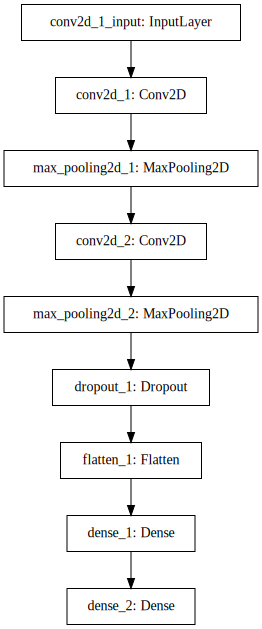

In [16]:
plot_model(model, to_file='drive/app/maxpooling.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

In [18]:
score = model.evaluate(X_test, test_labels, batch_size=128)

10000/10000 [==============================] - 2s 208us/step


In [19]:
print(score)
print(model.metrics_names)

[0.10425339111983777, 0.9684]
['loss', 'acc']


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


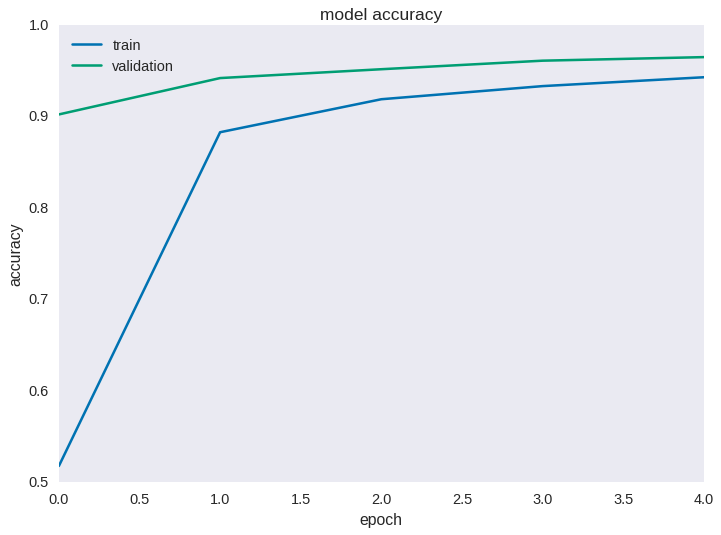

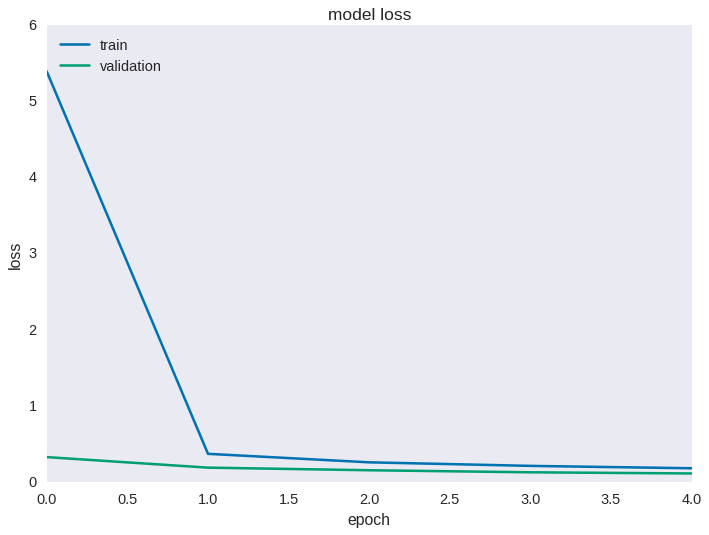

In [50]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.style.use('seaborn-pastel')
plt.show()

In [25]:
print(plt.style.available)

['dark_background', 'seaborn-pastel', 'seaborn-dark-palette', 'fast', 'grayscale', 'bmh', 'seaborn-white', 'seaborn-bright', 'seaborn', 'Solarize_Light2', '_classic_test', 'seaborn-notebook', 'seaborn-paper', 'seaborn-poster', 'fivethirtyeight', 'seaborn-ticks', 'seaborn-deep', 'seaborn-muted', 'ggplot', 'classic', 'seaborn-whitegrid', 'seaborn-talk', 'seaborn-colorblind', 'seaborn-darkgrid', 'seaborn-dark']


In [51]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [54]:
print(history.history['val_loss'])

[0.3305706087913778, 0.19255653665297562, 0.15846724953088495, 0.13151545843316448, 0.11636945222400957]


In [55]:
print(history.history['val_loss'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['acc'])

[0.3305706087913778, 0.19255653665297562, 0.15846724953088495, 0.13151545843316448, 0.11636945222400957]
[0.9020000017351575, 0.9417222208446927, 0.9513888855775198, 0.9607222212685479, 0.9646111097600725]
[5.385772568484147, 0.3737327910604931, 0.26222274487926844, 0.21577355664755618, 0.18432203547230788]
[0.5179285691784961, 0.8825476212160928, 0.9185952338434401, 0.9329285692600977, 0.9426190448658807]
